<a href="https://colab.research.google.com/github/rihenpe/mldl/blob/main/classMoodle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação**

## **Pre-Processamento**

In [ ]:
import pandas as pd
dataset = pd.read_csv('loadTest-4.csv', sep=";", decimal=",")
dataset.head()

,sexo,cargo,estado,regiao,identificacaoCurso,anoCurso,seqAnoCurso,categoriaCurso,notaFinal,idadeAluno,anosExercicio,situacaoAluno
0,1,4,7,3,48,2022,1,4,100.0,46.0,19.0,APROVADO
1,1,4,7,3,48,2022,1,4,95.0,43.0,19.0,APROVADO
2,1,4,20,2,48,2022,1,4,89.0,38.0,8.0,APROVADO
3,1,4,6,2,48,2022,1,4,96.0,46.0,20.0,APROVADO
4,2,4,17,2,48,2022,1,4,0.0,42.0,15.0,REPROVADO


In [ ]:
# from google.colab import drive
# drive.mount('https://drive.google.com/drive/folders/15xbm-vIkEhI5Frzu64nkJuK5UiRliyAA?usp=sharing')

In [ ]:
# Converte dados categoricos em numéricos

dataset = pd.get_dummies(dataset,drop_first=True)

In [ ]:
dataset.head()

,sexo,cargo,estado,regiao,identificacaoCurso,anoCurso,seqAnoCurso,categoriaCurso,notaFinal,idadeAluno,anosExercicio,situacaoAluno_REPROVADO
0,1,4,7,3,48,2022,1,4,100.0,46.0,19.0,0
1,1,4,7,3,48,2022,1,4,95.0,43.0,19.0,0
2,1,4,20,2,48,2022,1,4,89.0,38.0,8.0,0
3,1,4,6,2,48,2022,1,4,96.0,46.0,20.0,0
4,2,4,17,2,48,2022,1,4,0.0,42.0,15.0,1


In [ ]:
dataset.columns

Index(['sexo', 'cargo', 'estado', 'regiao', 'identificacaoCurso', 'anoCurso',
       'seqAnoCurso', 'categoriaCurso', 'notaFinal', 'idadeAluno',
       'anosExercicio', 'situacaoAluno_REPROVADO'],
      dtype='object')

In [ ]:
# retirar NaN

dataset = dataset[dataset["sexo"].notna()]
dataset = dataset[dataset["cargo"].notna()]
dataset = dataset[dataset["notaFinal"].notna()]


In [ ]:
dataset = dataset[dataset["idadeAluno"].notna()]
dataset = dataset[dataset["anosExercicio"].notna()]


In [ ]:
X = dataset.drop('situacaoAluno_REPROVADO',axis=1)

In [ ]:
X

,sexo,cargo,estado,regiao,identificacaoCurso,anoCurso,seqAnoCurso,categoriaCurso,notaFinal,idadeAluno,anosExercicio
0,1,4,7,3,48,2022,1,4,100.0,46.0,19.0
1,1,4,7,3,48,2022,1,4,95.0,43.0,19.0
2,1,4,20,2,48,2022,1,4,89.0,38.0,8.0
3,1,4,6,2,48,2022,1,4,96.0,46.0,20.0
4,2,4,17,2,48,2022,1,4,0.0,42.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
48845,1,6,11,4,66,2021,4,70,86.1,44.0,13.0
48846,1,1,7,3,66,2021,4,70,48.2,39.0,16.0
48847,1,1,7,3,66,2021,4,70,0.0,49.0,27.0
48848,1,2,7,3,66,2021,4,70,72.3,44.0,13.0


In [ ]:
y = dataset.situacaoAluno_REPROVADO

In [ ]:
y

0        0
1        0
2        0
3        0
4        1
        ..
48845    0
48846    1
48847    1
48848    0
48849    0
Name: situacaoAluno_REPROVADO, Length: 48850, dtype: uint8

In [ ]:
# dataset = pd.get_dummies(dataset,drop_first=True)
# X1 = dataset.iloc[:,1:3]
# X2 = dataset.iloc[:, 4:]
# X = pd.concat([X1,X2],axis=1)
# X
# y = dataset.iloc[:,3:4]
# y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
X

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

((22596, 11), (5649, 11))

In [ ]:
X_test

array([[  2.     ,   2.     ,  23.     , ..., 100.     ,  29.     ,
              nan],
       [  1.     ,   5.     ,  24.     , ..., 100.     ,  43.     ,
         13.     ],
       [  1.     ,   2.     ,  26.     , ...,  90.86067,  29.     ,
              nan],
       ...,
       [  1.     ,   2.     ,  19.     , ...,  95.     ,  46.     ,
              nan],
       [  1.     ,   2.     ,  22.     , ...,   0.     ,  35.     ,
              nan],
       [  1.     ,   2.     ,  24.     , ...,  90.     ,  48.     ,
         13.     ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(random_state = 0)
modelo_log.fit(X_train,y_train)
y_pred_log = modelo_log.predict(X_test)

## **SVM**

In [ ]:
from sklearn.svm import SVC
modelo_svm = SVC(kernel='linear', random_state = 0)
modelo_svm.fit(X_train,y_train)
y_pred_svm = modelo_svm.predict(X_test)

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
modelo_rf.fit(X_train,y_train)
y_pred_rf = modelo_rf.predict(X_test)

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors = 3)
modelo_knn.fit(X_train,y_train)
y_pred_knn = modelo_knn.predict(X_test)

## **Avaliação dos modelos**

### **Matriz de Confusão**

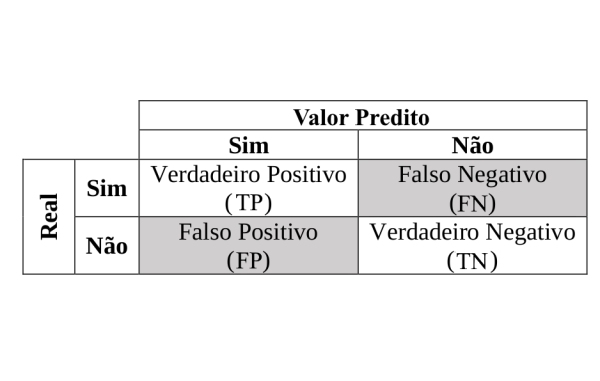

In [ ]:
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test,y_pred_log)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_knn = confusion_matrix(y_test,y_pred_knn)

In [ ]:
cm_log

array([[4113,    0],
       [  15, 1521]])

In [ ]:
acc_log = (cm_log[0,0]+cm_log[1,1])/cm_log.sum()
acc_svm = (cm_svm[0,0]+cm_svm[1,1])/cm_svm.sum()
acc_rf = (cm_rf[0,0]+cm_rf[1,1])/cm_rf.sum()
acc_knn = (cm_knn[0,0]+cm_knn[1,1])/cm_knn.sum()

In [ ]:
acc_log,acc_svm,acc_rf,acc_knn

(0.997344662772172, 0.9980527526995928, 1.0, 0.9865462913790052)

In [ ]:
cm_log

array([[4113,    0],
       [  15, 1521]])

In [ ]:
cm_svm

array([[4113,    0],
       [  11, 1525]])

In [ ]:
cm_rf

array([[4113,    0],
       [   0, 1536]])

In [ ]:
cm_knn

array([[4110,    3],
       [  73, 1463]])

In [ ]:
print('Logistic Regression: ', acc_log)
print('SVM: ', acc_svm)
print('Random Fortest: ', acc_rf)
print('Knn: ', acc_knn)


Logistic Regression:  0.997344662772172
SVM:  0.9980527526995928
Random Fortest:  1.0
Knn:  0.9865462913790052
